# LIF Neuron

## Install sapinet  (if not already done) 

Uncomment the following line if you have not installed sapinet as explained in the readme 

In [1]:
# %pip install git+https://github.com/cplab/sapinet2.git

## Import dependencies

We import pytorch here to handle tensor operation and generate some inputs. Later we will also use sapinet to handle I/O since sapinet inherit from pytorch. 

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

We also import the following sapinet classes to help us:
- `LIFNeuron` : Contains the code needed to run an instance of a leaky-integrate-and-fire neuron, one of the most used model of neuron abstraction 
- `spike_raster` : Here is the class that handles the plotting of the neuron outout (spikes). 

In [3]:
from sapinet.neuron.spiking.LIF import LIFNeuron
from sapinet.analysis.utils.plotting import spike_raster 

## Define experiment specific variables

Defining run-specific variables. Here we only need to know for how many step we want to simulate our neuron.

In [4]:
steps = 200

## Import `LIFNeuron` class

In [5]:
neuron = LIFNeuron()

## Generating step input 

Generating an input current step that we will pass to the neuron

In [6]:
I = torch.ones(steps) * 300
I[int(steps/2):] = 0
I[:int(steps/5)] = 0

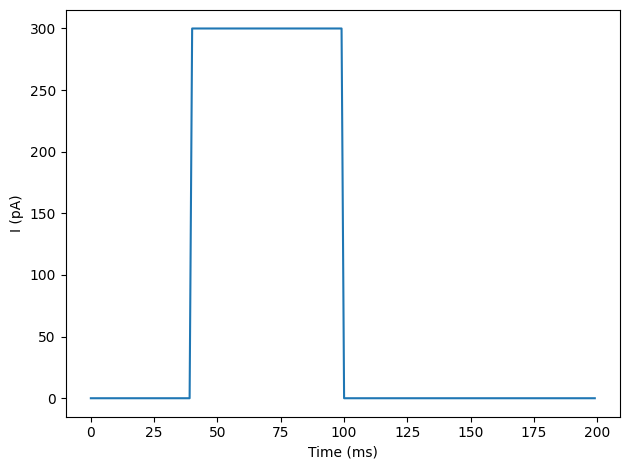

In [7]:
plt.subplots(1)
plt.plot(range(steps), I)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()

## Getting neuron outputs (membrane voltage and spikes)

In [8]:
output = [neuron.forward(I[i]) for i in range(steps)]
print(output[0])

{'volt_mem': tensor([-75.]), 'spiked': tensor([0], dtype=torch.int32), 'input': tensor([0.])}


## Plotting membrane voltage

In [9]:
volt_mem = [output[i].get('volt_mem') for i in range(steps)]
volt_mem = torch.cat(volt_mem)
volt_mem = volt_mem.unsqueeze(1)
volt_mem.shape

torch.Size([200, 1])

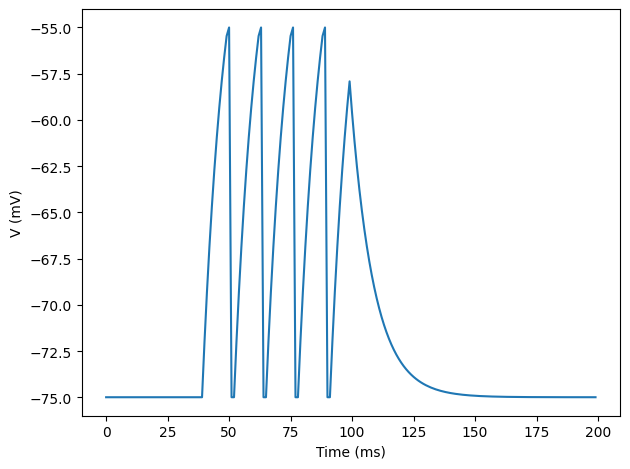

In [10]:
plt.subplots(1)
plt.plot(range(steps), volt_mem)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.tight_layout()
plt.show()

In [11]:
spikes = [output[i].get('spiked') for i in range(steps)]
spikes = torch.cat(spikes)
spikes = spikes.unsqueeze(1)
print(spikes.shape)

torch.Size([200, 1])


## Plotting spike output

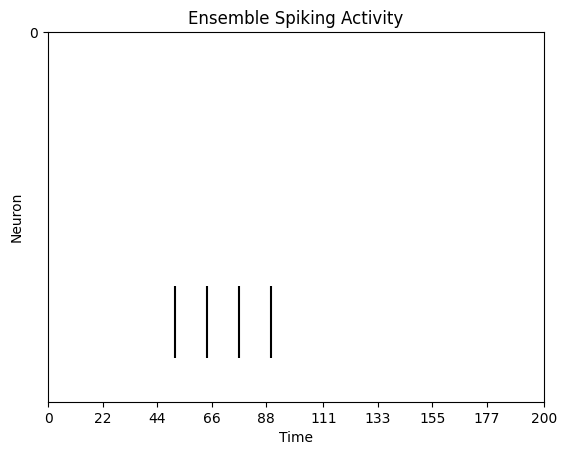

In [12]:
spike_raster(spikes)

## Let's try a different input

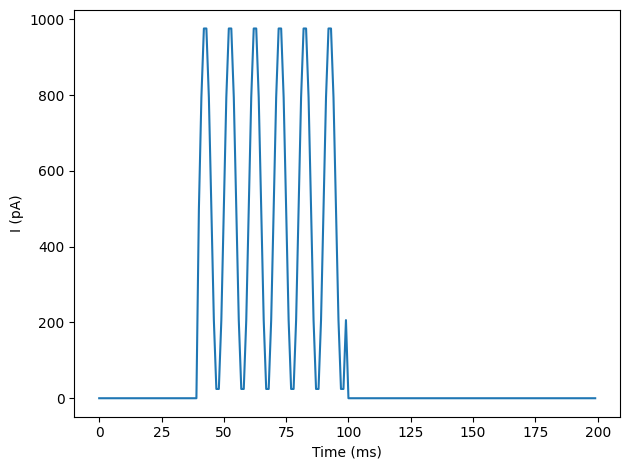

In [13]:
neuron2 = LIFNeuron()

sin_wave = torch.tensor(np.sin(2 * np.pi * 20 * np.arange(steps) / 200) * 500 + 500)

sin_wave[int(steps/2):] = 0
sin_wave[:int(steps/5)] = 0

plt.subplots(1)
plt.plot(range(steps), sin_wave)
plt.xlabel('Time (ms)')
plt.ylabel('I (pA)')
plt.tight_layout()
plt.show()

In [14]:
output2 = [neuron2.forward(sin_wave[i]) for i in range(steps)]

In [15]:
volt_mem2 = [output2[i].get('volt_mem') for i in range(steps)]
volt_mem2 = torch.cat(volt_mem2)
volt_mem2 = volt_mem2.unsqueeze(1)
volt_mem2.shape

torch.Size([200, 1])

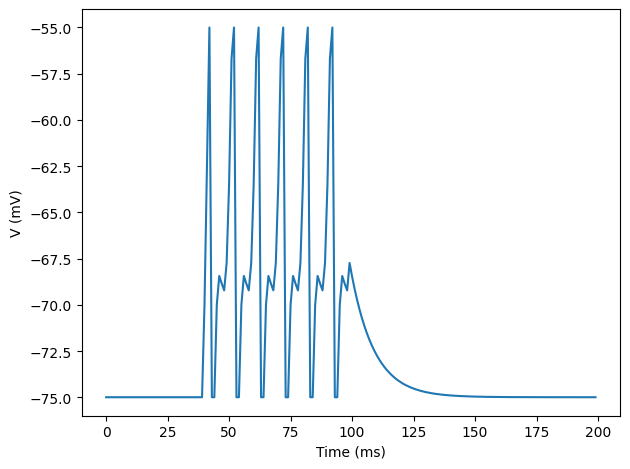

In [16]:
plt.subplots(1)
plt.plot(range(steps), volt_mem2)
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.tight_layout()
plt.show()


In [17]:
spikes2 = [output2[i].get('spiked') for i in range(steps)]
spikes2 = torch.cat(spikes2)
spikes2 = spikes2.unsqueeze(1)

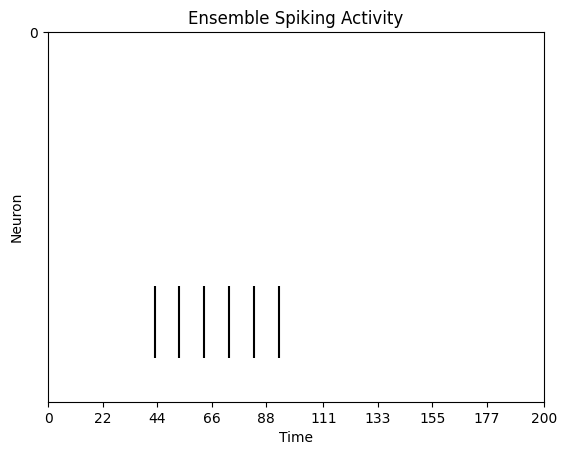

In [18]:
spike_raster(spikes2)

## Let's make this exploration more interactive interactive so we can explore the different parameters

In [19]:
import ipywidgets as widgets
from IPython.display import display

In [20]:
def LIFSimulation(steps, 
                  i_start, 
                  i_end, 
                  i_amp, 
                  volt_thresh, 
                  volt_rest, 
                  leak_gl, 
                  tau_mem, 
                  tau_ref):
    
    steps = steps

    I = torch.zeros(steps)
    I[i_start:i_end] = 1 * i_amp

    neuron3 = LIFNeuron(volt_thresh=volt_thresh, 
                        volt_rest=volt_rest, 
                        leak_gl=leak_gl, 
                        tau_mem=tau_mem, 
                        tau_ref= tau_ref)
    
    output3 = [neuron3.forward(I[i]) for i in range(steps)]
        
    volt_mem3 = [output3[i].get('volt_mem') for i in range(steps)]
    volt_mem3 = torch.cat(volt_mem3)
    volt_mem3 = volt_mem3.unsqueeze(1)
     
    fig, (ax1,ax2) = plt.subplots(2)
    ax1.plot(range(steps), I)
    ax2.plot(range(steps), volt_mem3)
    ax2.axhline(volt_thresh, color='green')

In [21]:

widgets.interact(LIFSimulation,
                 steps = widgets.IntSlider(min = 10, max = 1000, value = 100),
                 i_start = widgets.IntSlider(min = 0, max = 1000, value=30),
                 i_end = widgets.IntSlider(min = 0, max = 1000, value = 60),
                 i_amp  = widgets.IntSlider(min = 0, max = 1000, value = 300),
                 volt_thresh=widgets.IntSlider(min=-70, max=20, value=-55),
                 volt_rest=widgets.IntSlider(min=-100, max=0, value=-75),
                 leak_gl=widgets.IntSlider(min=0, max=40, value=10),
                 tau_mem=widgets.IntSlider(min=0, max=100, value=10),
                 tau_ref=widgets.IntSlider(min=0, max=20, step=1, value=2)
                )

interactive(children=(IntSlider(value=100, description='steps', max=1000, min=10), IntSlider(value=30, descrip…

<function __main__.LIFSimulation(steps, i_start, i_end, i_amp, volt_thresh, volt_rest, leak_gl, tau_mem, tau_ref)>